In [105]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [82]:
!ls ./data

2023-6-12-20-53.csv 2023-6-12-21-10.csv 2023-6-12-22-37.csv
2023-6-12-21-0.csv  2023-6-12-22-3.csv


In [89]:
data = pd.read_csv("./data/2023-6-12-22-37.csv", header=None) 
t = data[0].to_numpy()
x1_laser = data[1].to_numpy()
x2_laser = data[2].to_numpy()
x1_sound = data[3].to_numpy()
x2_sound = data[4].to_numpy()

t = t - t[0]

data

,0,1,2,3,4
0,32.52,0,0,-3.05,-1.02
1,32.55,0,0,-2.98,-1.02
2,32.58,0,0,-3.05,-1.63
3,32.61,0,0,-2.85,-1.22
4,32.64,0,0,-2.85,-1.15
...,...,...,...,...,...
776,55.92,0,0,0.14,1.63
777,55.95,0,0,0.14,0.27
778,55.98,0,0,0.34,-0.07
779,56.01,0,0,0.00,-0.27


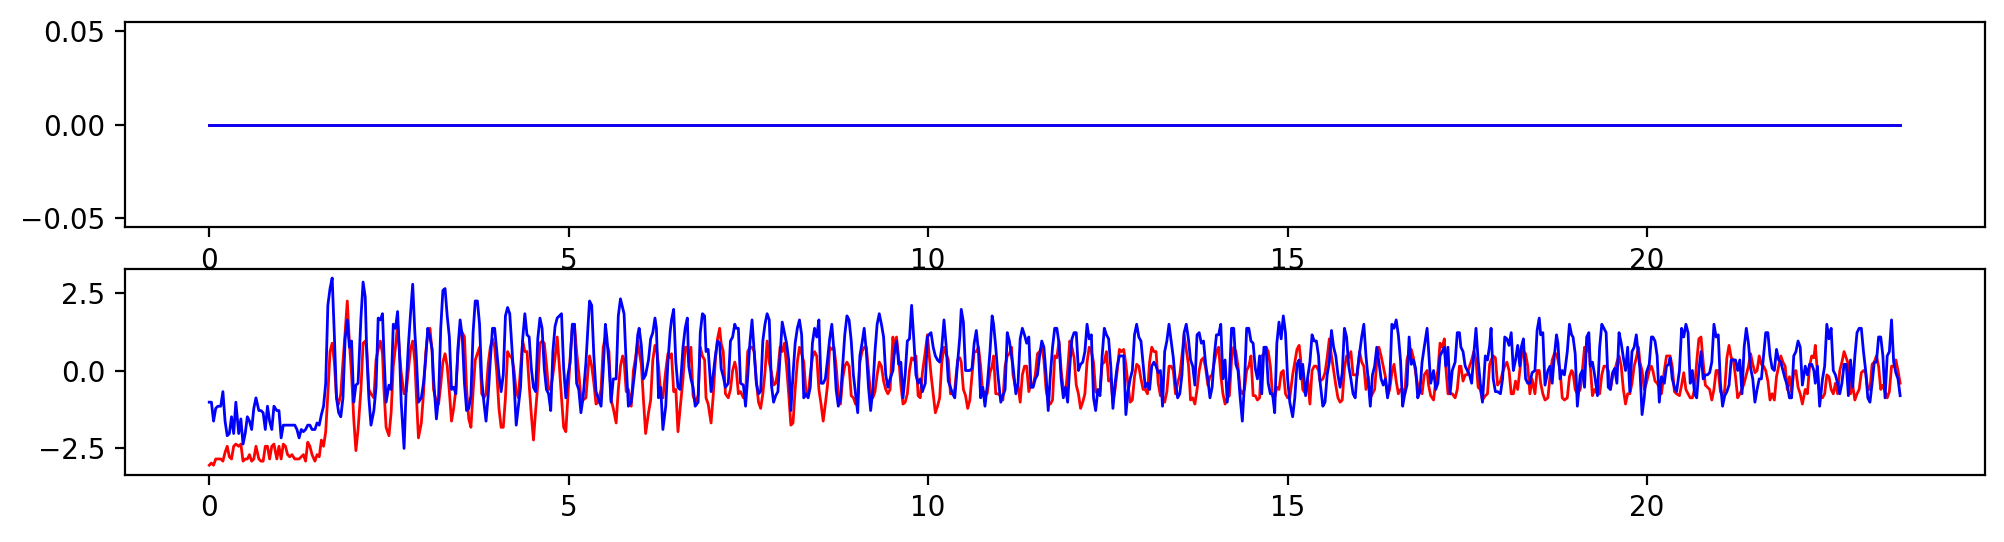

In [90]:
fig = plt.figure(dpi=200,figsize=(12,3))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(t,x1_laser,color='red',linewidth=1)
ax1.plot(t,x2_laser,color='blue',linewidth=1)

ax2.plot(t,x1_sound,color='red',linewidth=1)
ax2.plot(t,x2_sound,color='blue',linewidth=1)

plt.show()

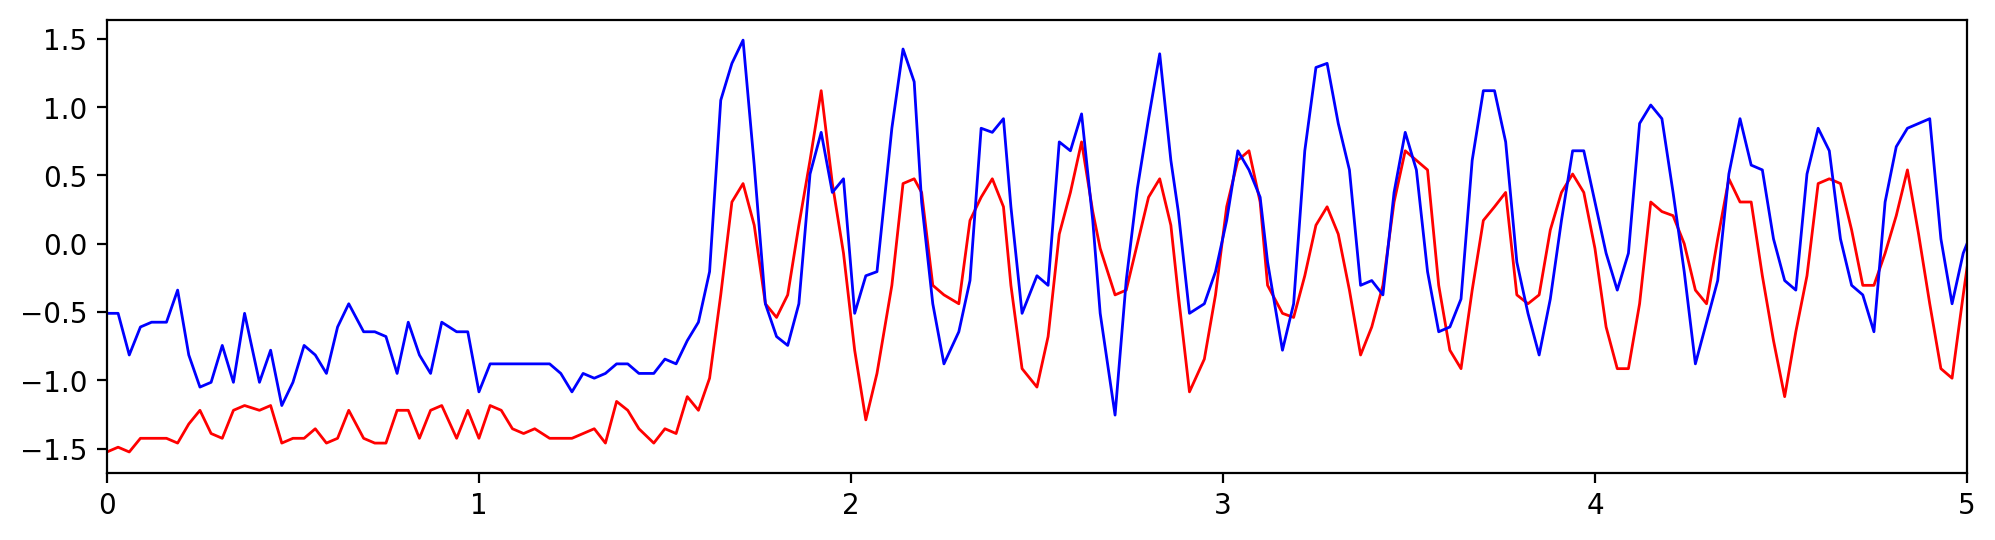

In [92]:
fig = plt.figure(dpi=200,figsize=(12,3))
x1 = (x1_laser + x1_sound)/2.0
x2 = (x2_laser + x2_sound)/2.0
plt.plot(t,x1,color='red',linewidth=1)
plt.plot(t,x2,color='blue',linewidth=1)
plt.xlim(0,5)
plt.show()

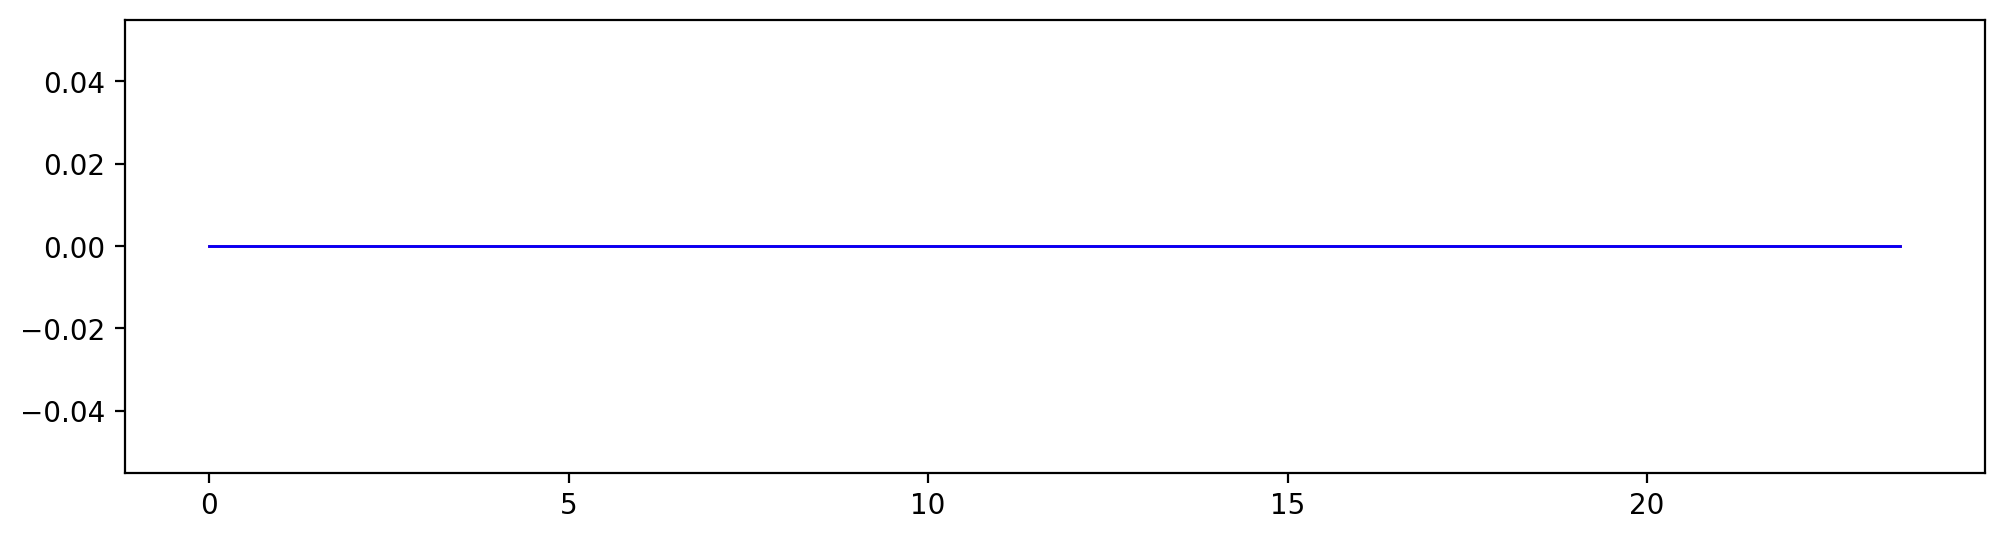

In [93]:
x1 = (x1_laser + x1_sound)/2.0
x2 = (x2_laser + x2_sound)/2.0
x1= x1_laser
x2= x2_laser

win_size = 11

x1_ = savgol_filter(x1, win_size, 3)
x2_ = savgol_filter(x2, win_size, 3)

fig = plt.figure(dpi=200,figsize=(12,3))
plt.plot(t,x1_,color='red',linewidth=1)
plt.plot(t,x2_,color='blue',linewidth=1)

plt.show()

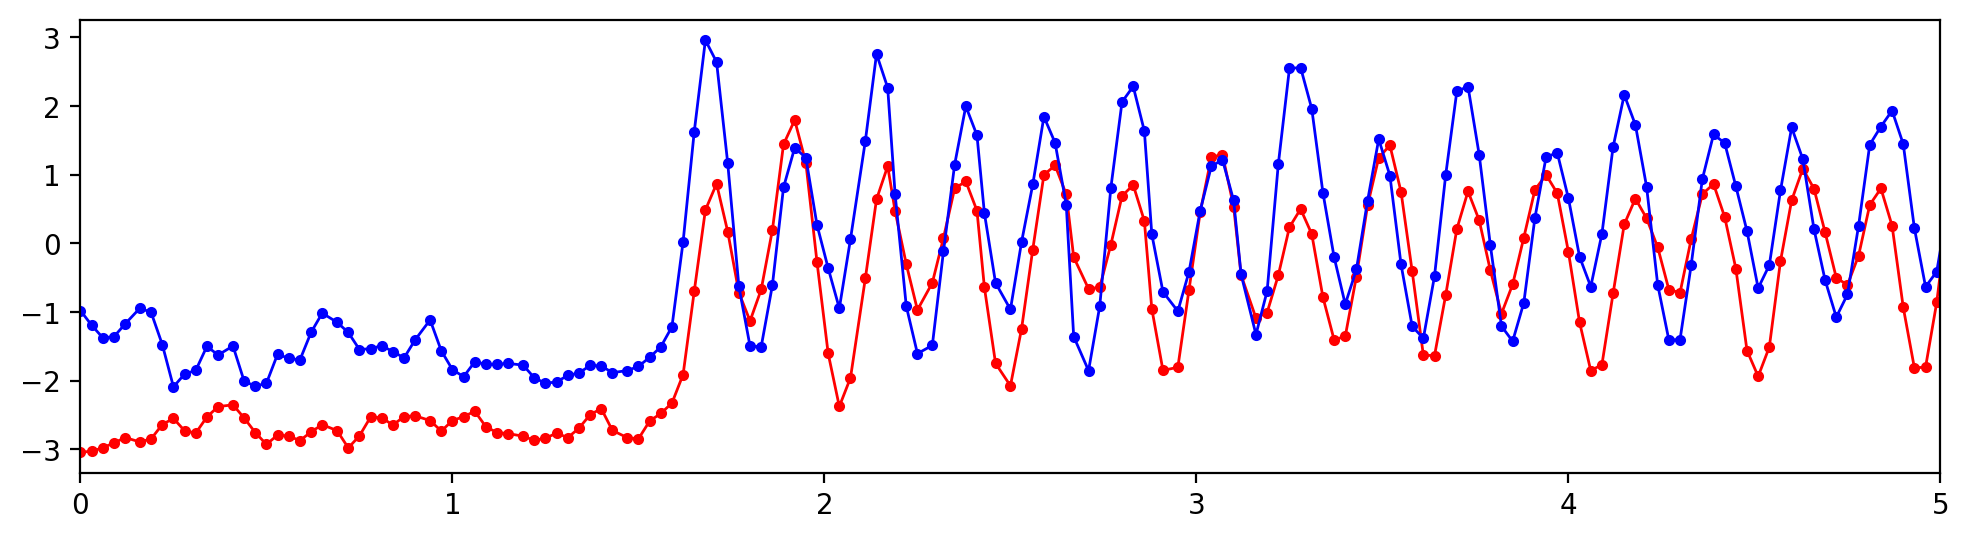

In [102]:
# x1 = (x1_laser + x1_sound)/2.0
x2 = (x2_laser + x2_sound)/2.0
x1= x1_sound
x2= x2_sound

win_size = 5

x1_ = savgol_filter(x1, win_size, 3)
x2_ = savgol_filter(x2, win_size, 3)

fig = plt.figure(dpi=200,figsize=(12,3))
plt.plot(t,x1_,'-o',color='red',linewidth=1,markersize=3)
plt.plot(t,x2_,'-o',color='blue',linewidth=1,markersize=3)
plt.xlim(0,5)
plt.show()

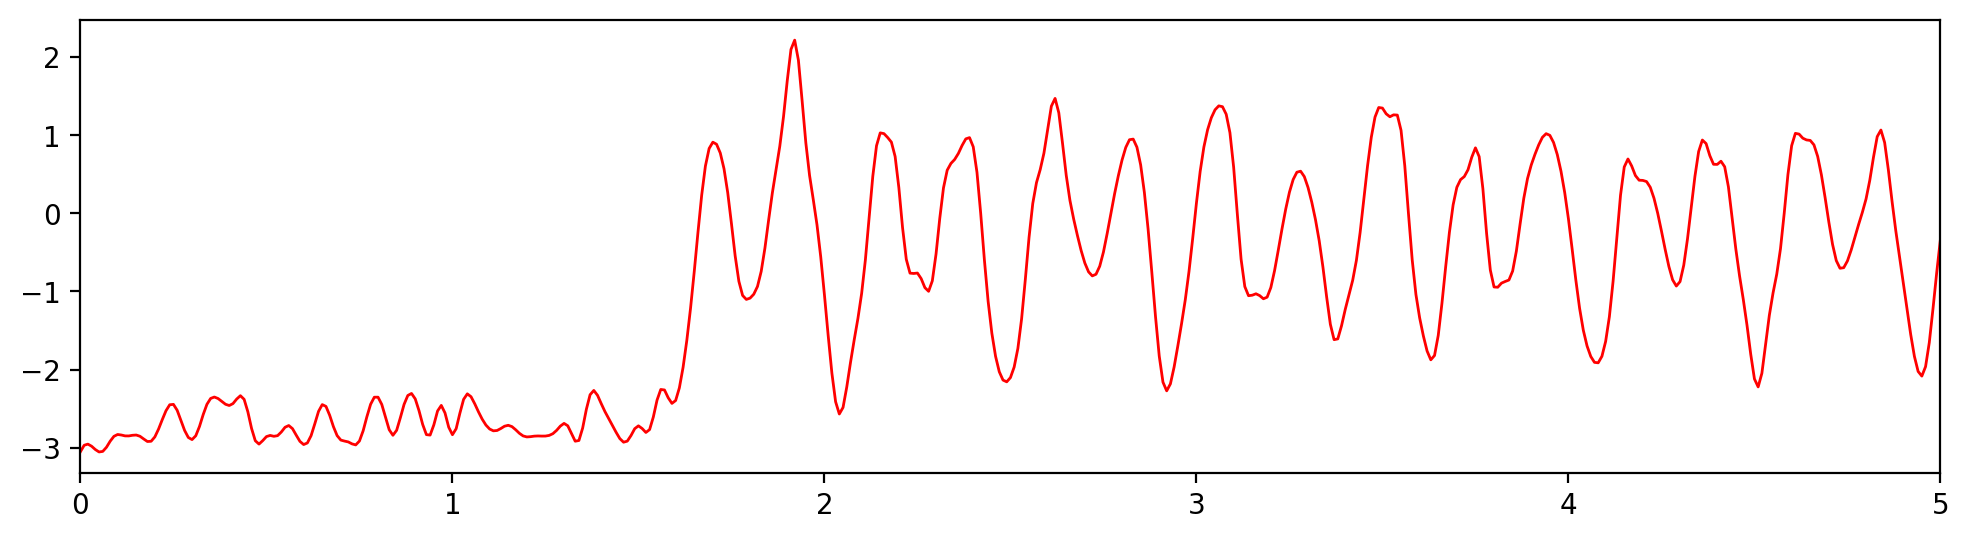

In [116]:
x1 = CubicSpline(t, x1_sound)
x2 = CubicSpline(t, x2_sound)

ts = np.arange(0,15,0.01)
x1s = x1(ts)
x2s = x2(ts)

win_size = 5

x1_ = savgol_filter(x1s, win_size, 3)
x2_ = savgol_filter(x2s, win_size, 3)

fig = plt.figure(dpi=200,figsize=(12,3))
plt.plot(ts,x1_,color='red',linewidth=1,markersize=3)
# plt.plot(ts,x2_,color='blue',linewidth=1,markersize=3)
plt.xlim(0,5)
plt.show()
